### A set of numpy exercises

In [1]:
import numpy as np

Write a function that takes in a vector and returns a new vector where
every element is separated by 4 consecutive zeros.

Example:
[4, 2, 1] --> [4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1]

* param x: input vector
* type x: numpy.array
* return: input vector with elements separated by 4 zeros
* rtype: numpy.array

In [2]:
def zero_insert(x):
    if np.any(x):
        zeros = np.zeros(4)
        dim = x.shape
        vec = [np.append(x[i], zeros) for i in range(0, dim[0] - 1)]
        vec = np.append(vec, x[dim[0] - 1])
        return vec
    else:
        vec = x
        return vec

x = np.array([4, 2, 1])
zero_insert(x)

array([4., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1.])

Write a function that takes in a vector and returns the value contained in the vector that is closest to a given value. If two values are equidistant from val, return the one that comes first in
the vector.

Example:
([3, 4, 5], 2) --> 3

* param x: input vector
* type x: numpy.array of int/float
* param val: input value
* type val: int | float
* return: value from x closest to val
* rtype: int | float
* raise ValueError:

In [3]:
def return_closest(x, val):
    dif = np.abs(x - val)
    val_clo = dif.argmin()
    elem = x[val_clo]
    return elem

x = np.array([3, 4, 5])
val = 2
return_closest(x, val)

3

Write a function that takes in two vectors and returns the associated Cauchy
matrix with entries a_ij = 1/(x_i-y_j).

Example:
([1, 2], [3, 4]) --> [[-1/2, -1/3], [-1, -1/2]]

Note: the function should raise an error of type ValueError if there is a pair (i,j) such that x_i=y_j

* param x: input vector
* type x: numpy.array of int/float
* param y: input vector
* type y: numpy.array of int/float
* return: Cauchy matrix with entries 1/(x_i-y_j)
* rtype: numpy.array of float
* raise ValueError:

In [4]:
def cauchy(x, y):
    error = 0
    if np.any(x):
        for i in np.nditer(x):
            for j in np.nditer(y):
                if i == j or i == 0 or j == 0:
                    error = 1
                    break
        if error == 0:
            x = x.reshape((-1, 1))  # -1 = transpose
            diff = x - y
            cauchy_matrix = 1/diff
            return cauchy_matrix
        else:
            return ValueError('There is a pair (i, j)')
    else:
        return np.empty([0, 0])

x = np.array([1, 2])
y = np.array([3, 4])
cauchy(x, y)

array([[-0.5       , -0.33333333],
       [-1.        , -0.5       ]])

Write a function that takes in a vector x and a list of vectors and finds,
in the list, the index of the vector that is most similar to x using
cosine similarity.

Example:
([1, 1], [[1, 0.9], [-1, 1]]) --> 0 (corresponding to [1,0.9])

* param x: input vector
* type x: numpy.array of int/float
* param v_list: list of vectors
* type v_list: list of numpy.array
* return: index of element in list that is closest to x in cosine-sim
* rtype: int

In [5]:
def most_similar(x, v_list):

    inner = [x @ v_list[row]/np.sqrt(x @ x*v_list[row] @ v_list[row]) for row in range(len(v_list))]
    index_elem = np.argmax(inner)
    return index_elem

x = np.array([1, 1])
v_list = np.array([[1, 0.9],[-1, 1]])
most_similar(x, v_list)

0

Write a function that does gradient descent with a fixed learning_rate on function f with gradient g and stops when the update has magnitude under a given tolerance level (i.e. when |xk-x(k-1)| < tol).
Return a tuple with the position, the value of f at that position and the magnitude of the last update.
* h(x) = (x-1)^2 + exp(-x^2/2)
* f(x) = log(h(x))
* g(x) = (2(x-1) - x exp(-x^2/2)) / h(x)

Example:
(1.0, 0.1, 1e-3) --> approximately (1.2807, -0.6555, 0.0008)

* param x_0: initial point
* type x_0: float
* param learning_rate: fixed learning_rate
* type learning_rate: float
* param tol: tolerance for the magnitude of the update
* type tol: float
* return: the position, the value at that position and the latest update
* rtype: tuple of three float

In [6]:
def gradient_descent(x_0, learning_rate, tol):
    def h(x): return (x-1)**2 + np.exp(-x**2/2)
    def f(x): return np.log(h(x))
    def g(x): return (2*(x-1)- x*np.exp((-x**2)/2))/h(x)
    x_current = x_0
    prev_step = learning_rate
    while prev_step > tol:
        x_previous = x_current
        x_current -= learning_rate*g(x_previous)
        prev_step = abs(x_current - x_previous)
    return ((x_current, f(x_current),prev_step))

x_0 = 1
learning_rate = 0.1
tol = 1e-3
gradient_descent(x_0, learning_rate, tol)

(1.2807049030422724, -0.6555012751335543, 0.0008917935976979763)


    Write a function to determine if a string is only made of unique
    characters and returns True if that's the case, False otherwise.
    Upper case and lower case should be considered as the same character.

    Example:
    "qwr#!" --> True, "q Qdf" --> False

    :param string: input string
    :type string:  string
    :return:      true or false if string is made of unique characters
    :rtype:        bool
    """

In [7]:
def all_unique_chars(string):
    
    str = string.lower()
    uniq_char = 0
    for i, _ in enumerate(string):
        for j in range(i + 1, len(str)):
            #print(j)
            if str[i] == str[j]:
                uniq_char = 1

    if uniq_char == 1:
        return False
    else:
        return True

string = "qwr#!"
all_unique_chars(string)

True


    Write a function that takes a square matrix of integers and returns a set of all valid
    positions (i,j) of a value. Each position should be returned as a tuple of two
    integers.

    The matrix is structured in the following way:
    - each row has strictly decreasing values with the column index increasing
    - each column has strictly decreasing values with the row index increasing
    The following matrix is an example:

    Example 1 :
    mat = [ [10, 7, 5],
            [ 9, 4, 2],
            [ 5, 2, 1] ]
    find_element(mat, 4) --> {(1, 1)}

    Example 2 :
    mat = [ [10, 7, 5],
            [ 9, 4, 2],
            [ 5, 2, 1] ]
    find_element(mat, 5) --> {(0, 2), (2, 0)}

    The function should raise an exception ValueError if the value isn't found.

    :param sq_mat: the square input matrix with decreasing rows and columns
    :type sq_mat:  numpy.array of int
    :param val:    the value to be found in the matrix
    :type val:     int
    :return:       all positions of the value in the matrix
    :rtype:        set of tuple of int
    :raise ValueError:


In [8]:
def find_element(sq_mat, val):

    index_val = np.where(sq_mat == val)
    result = set(zip(index_val[0], index_val[1]))
    if result:
        return result
    else:
        raise ValueError('Value is not found')

sq_mat = np.array([[10, 7, 5], [9, 4, 2], [5, 2, 1]])
val = 4
find_element(sq_mat, val)

{(1, 1)}


    Write a function that takes an n x p matrix of integers and sets the rows
    and columns of every zero-entry to zero.

    Example:
    [ [1, 2, 3, 1],        [ [0, 2, 0, 1],
      [5, 2, 0, 2],   -->    [0, 0, 0, 0],
      [0, 1, 3, 3] ]         [0, 0, 0, 0] ]

    :param mat: input matrix
    :type mat:  numpy.array of int
    :return:   a matrix where rows and columns of zero entries in mat are zero
    :rtype:    numpy.array


In [9]:
def filter_matrix(mat):
   
    if np.any(mat):
        find_zero = tuple(np.where(mat == 0))
        ind_zero = tuple(zip(find_zero[0], find_zero[1]))
        for _, elem in enumerate(ind_zero):
            mat[elem[0],:]=0
            mat[:,elem[1]]=0
            filter_matx = mat
        return filter_matx
    else:
        return mat

mat = np.array([[1, 2, 3, 1], [5, 2, 0, 2], [0, 1, 3, 3]])
filter_matrix(mat)

array([[0, 2, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])


    Write a function that takes in a list of integers,
    finds the sublist of contiguous values with at least one
    element that has the largest sum and returns the sum.
    If the list is empty, 0 should be returned.

    Example:
    [-1, 2, 7, -3] --> the sublist with larger sum is [2, 7], the sum is 9.

    :param intlist: input list of integers
    :type intlist:  list of int
    :return:       the largest sum
    :rtype:         int


In [10]:
def largest_sum(intlist):

    maxSum = float("-inf")     #Kandane's Algorithm edited
    cur_max_sum = 0
    if intlist:
        for i in intlist:
            cur_max_sum = cur_max_sum + i
            if cur_max_sum > maxSum :
                maxSum = cur_max_sum
            if cur_max_sum < 0 :
                cur_max_sum = 0
        return maxSum
    else:
        return 0

intlist = [-1, 2, 7, -3]
largest_sum(intlist)


9

## A set of pandas exercises

In [ ]:
import pandas as pd

    Write a function that takes a DataFrame with a colum `A` of integers and
    filters out the rows which contain the same value as a row above.
    Check that the index is right, use reset_index if necessary.

    Example:
        A   ...            A   ...
    ___________        ___________
    0 | 1 | ...        0 | 1 | ...
    1 | 1 | ...        1 | 0 | ...
    2 | 0 | ...  -->   2 | 5 | ...
    3 | 5 | ...        3 | 2 | ...
    4 | 5 | ...
    5 | 5 | ...
    6 | 2 | ...
    7 | 1 | ...

    :param df: input data frame with a column `A`
    :type df: pandas.DataFrame
    :return: a dataframe where rows have been filtered out
    :rtype: pandas.DataFrame


In [11]:
def filter_rep(df):
    
    df_filtered = df.drop_duplicates('A', keep="first")
    df_filt = df_filtered.reset_index(drop=True)
    return df_filt

df = pd.DataFrame({'A': [1, 1, 0, 5, 5, 5, 2, 1]})
filter_rep(df)

,A
0,1
1,0
2,5
3,2


    Given a DataFrame of numeric values, write a function to subtract the row
    mean from each element in the row.

    Example:
        A   B   C                A     B     C
    _____________         _____________________
    0 | 1 | 5 | 0    -->  0 | -1.0 | 3.0 | -2.0
    1 | 2 | 6 | 1         1 | -1.0 | 3.0 | -2.0

    :param df: input data frame
    :type df:  pandas.DataFrame
    :return:  a dataframe where each row is centred
    :rtype:   pandas.DataFrame

In [12]:
def subtract_row_mean(df):

    mean = df.mean(axis=1)
    subtr = df.sub(mean, axis=0)
    return subtr

df = pd.DataFrame({'A': [1, 2], 'B': [5, 6], 'C': [0,1]})
subtract_row_mean(df)

,A,B,C
0,-1.0,3.0,-2.0
1,-1.0,3.0,-2.0


### A set of exercises with matplotlib

In [13]:
import matplotlib.pyplot as plt

Here is some chemistry data:
   Time (decade): 0, 1, 2, 3, 4, 5, 6
   CO2 concentration (ppm): 250, 265, 272, 260, 300, 320, 389

Create a line graph of CO2 versus time, the line should be a blue dashed line.
* The title of the plot should be 'Chemistry data'
* The label of the x axis should be 'Time (decade)'
* The label of the y axis should be 'CO2 concentration (ppm)'


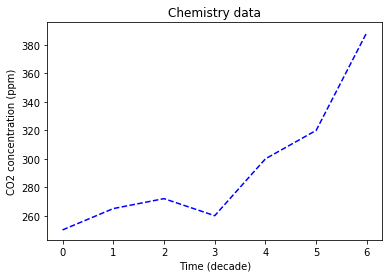

In [14]:
def draw_co2_plot():
    time = np.array([0, 1, 2, 3, 4, 5, 6])
    co2 = np.array([250, 265, 272, 260, 300, 320, 389])
    plt.plot(time, co2, ls='dashed', color='blue')
    plt.title("Chemistry data")
    plt.xlabel("Time (decade)")
    plt.ylabel("CO2 concentration (ppm)")
    plt.show()

draw_co2_plot()

Plot the following lines on the same plot

* y=cos(x) coloured in red with dashed lines
* y=x^2 coloured in blue with linewidth 3
* y=exp(-x^2) coloured in black

Add a legend, title for the x-axis and a title to the curve, the x-axis
should range from -4 to 4 (with 50 points) and the y axis should range
from 0 to 2. The figure should have a size of 8x6 inches.

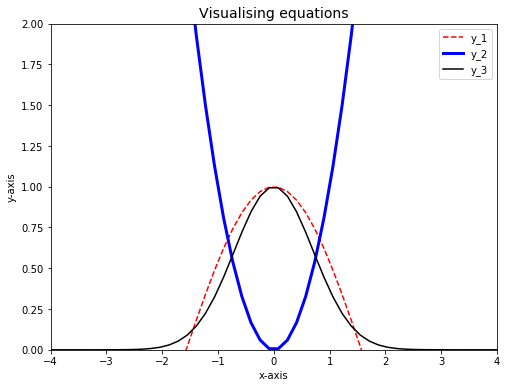

In [15]:
def draw_equations_plot():
    x = np.linspace(- 4, 4, 50)
    y_1 = np.cos(x)
    y_2 = x**2
    y_3 = np.exp(-x**2)
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_1, ls='dashed', color='red', label='y_1')
    plt.plot(x, y_2, color='blue', linewidth=3, label='y_2')
    plt.plot(x, y_3, color='black', label='y_3')
    plt.legend()
    plt.title("Visualising equations", fontsize=14)
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.xlim(-4, 4)
    plt.ylim(0, 2)
    plt.show()
    
draw_equations_plot()